In [9]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [10]:
import mysql.connector

connection = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='123456',
    database='hello_mysql'
)

cursor = connection.cursor()
cursor.execute("SELECT * FROM users")
for row in cursor.fetchall():
    print(row)

cursor.close()
connection.close()


(1, 'May Blanda', 'Elmo_Baumbach21@gmail.com', datetime.datetime(2024, 12, 13, 22, 26, 26), datetime.datetime(2024, 12, 13, 22, 26, 26))
(2, 'Russell Metz', 'Veda.Waelchi64@gmail.com', datetime.datetime(2024, 12, 13, 22, 26, 26), datetime.datetime(2024, 12, 13, 22, 26, 26))
(3, 'Johnnie Hyatt', 'Elmira.Howell57@yahoo.com', datetime.datetime(2024, 12, 13, 22, 26, 26), datetime.datetime(2024, 12, 13, 22, 26, 26))
(4, 'Doyle Oberbrunner', 'Graciela_Heller61@gmail.com', datetime.datetime(2024, 12, 13, 22, 26, 26), datetime.datetime(2024, 12, 13, 22, 26, 26))
(5, 'Ms. Tanya Oberbrunner', 'Fanny40@hotmail.com', datetime.datetime(2024, 12, 13, 22, 26, 26), datetime.datetime(2024, 12, 13, 22, 26, 26))
(6, 'Kate Cummings DDS', 'Ebony99@gmail.com', datetime.datetime(2024, 12, 13, 22, 40, 48), datetime.datetime(2024, 12, 13, 22, 40, 48))
(7, 'Jorge Lockman', 'Kip.Doyle18@gmail.com', datetime.datetime(2024, 12, 13, 22, 40, 48), datetime.datetime(2024, 12, 13, 22, 40, 48))
(8, 'Ervin Kuvalis', 'Des

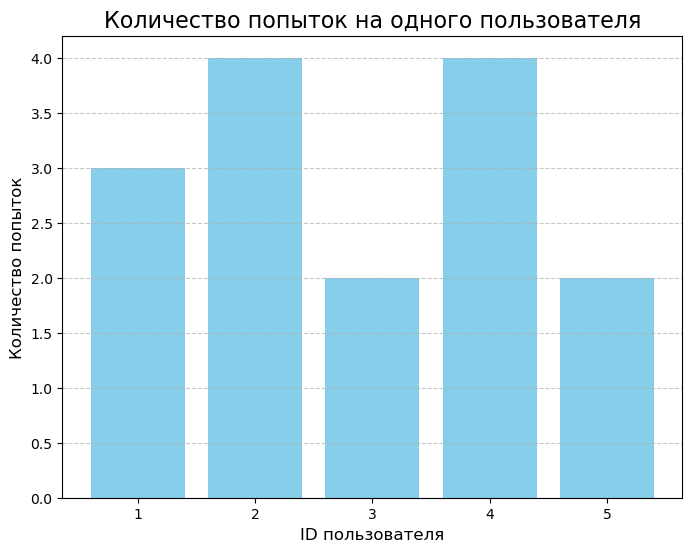

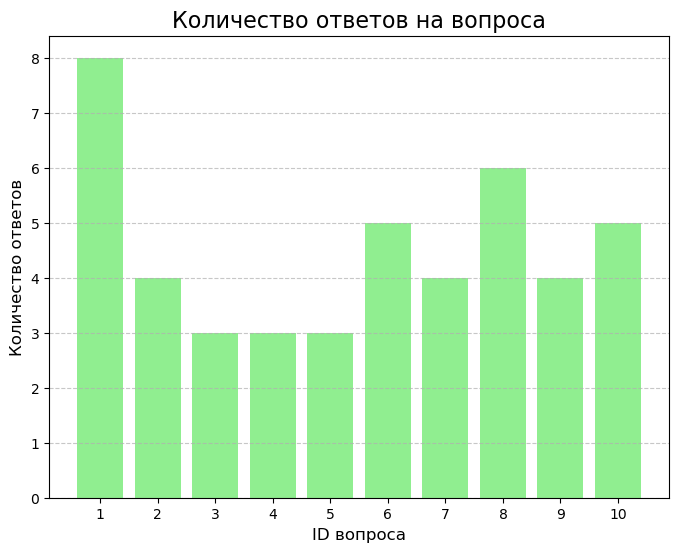

In [11]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que se muestren los gráficos en Jupyter
%matplotlib inline

# Configuración de conexión a la base de datos
connection = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="123456",  # Cambia según tu configuración
    database="hello_mysql"
)

# Función para cargar datos de la base de datos en un DataFrame
def load_data(query):
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [col[0] for col in cursor.description]
    cursor.close()
    return pd.DataFrame(data, columns=columns)

# Consultas SQL para obtener datos
query_attempts = """
SELECT user_id, COUNT(*) AS attempts_count
FROM UserAttempts
GROUP BY user_id
"""

query_answers = """
SELECT question_id, COUNT(*) AS answers_count
FROM Answers
GROUP BY question_id
"""

# Cargar datos en DataFrames
df_attempts = load_data(query_attempts)
df_answers = load_data(query_answers)

# Gráfico 1: Número de intentos por usuario
plt.figure(figsize=(8, 6))
plt.bar(df_attempts["user_id"], df_attempts["attempts_count"], color='skyblue')
plt.title("Количество попыток на одного пользователя", fontsize=16)
plt.xlabel("ID пользователя", fontsize=12)
plt.ylabel("Количество попыток", fontsize=12)
plt.xticks(df_attempts["user_id"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Gráfico 2: Número de respuestas por pregunta
plt.figure(figsize=(8, 6))
plt.bar(df_answers["question_id"], df_answers["answers_count"], color='lightgreen')
plt.title("Количество ответов на вопросa", fontsize=16)
plt.xlabel("ID вопроса", fontsize=12)
plt.ylabel("Количество ответов", fontsize=12)
plt.xticks(df_answers["question_id"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Cierra la conexión a la base de datos
connection.close()


C:\Users\dmend\AppData\Local\Temp\ipykernel_21532\2377892983.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, connection)


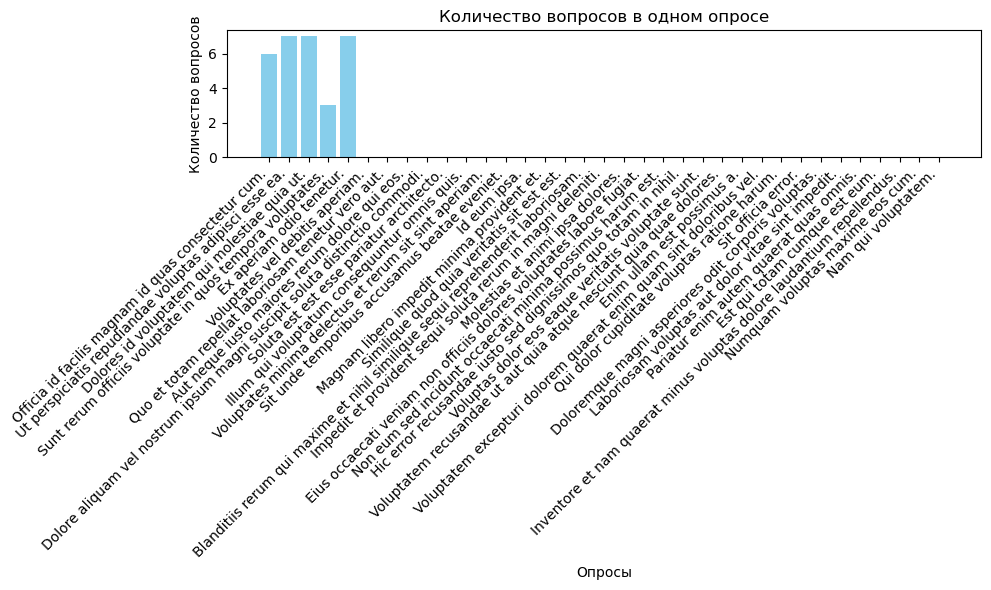

C:\Users\dmend\AppData\Local\Temp\ipykernel_21532\2377892983.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, connection)


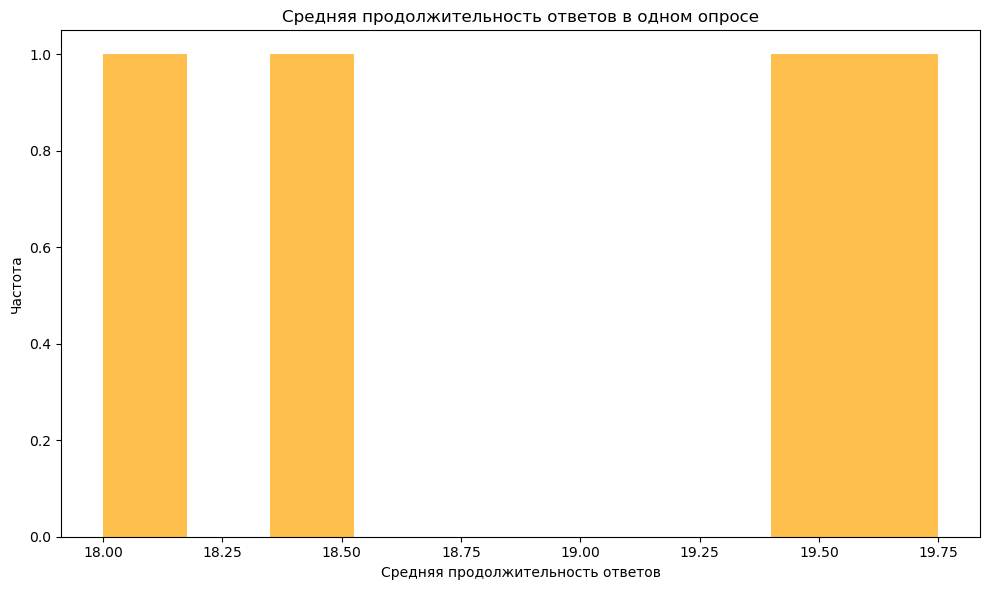

C:\Users\dmend\AppData\Local\Temp\ipykernel_21532\2377892983.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, connection)


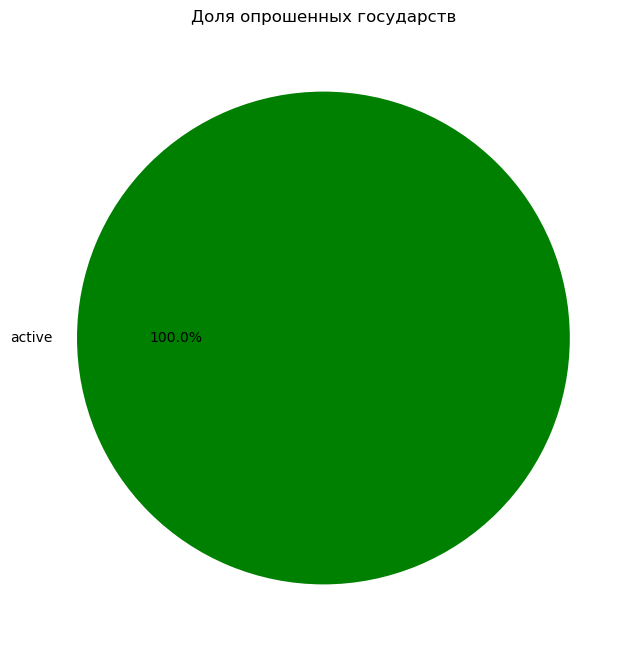

C:\Users\dmend\AppData\Local\Temp\ipykernel_21532\2377892983.py:66: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query4, connection)


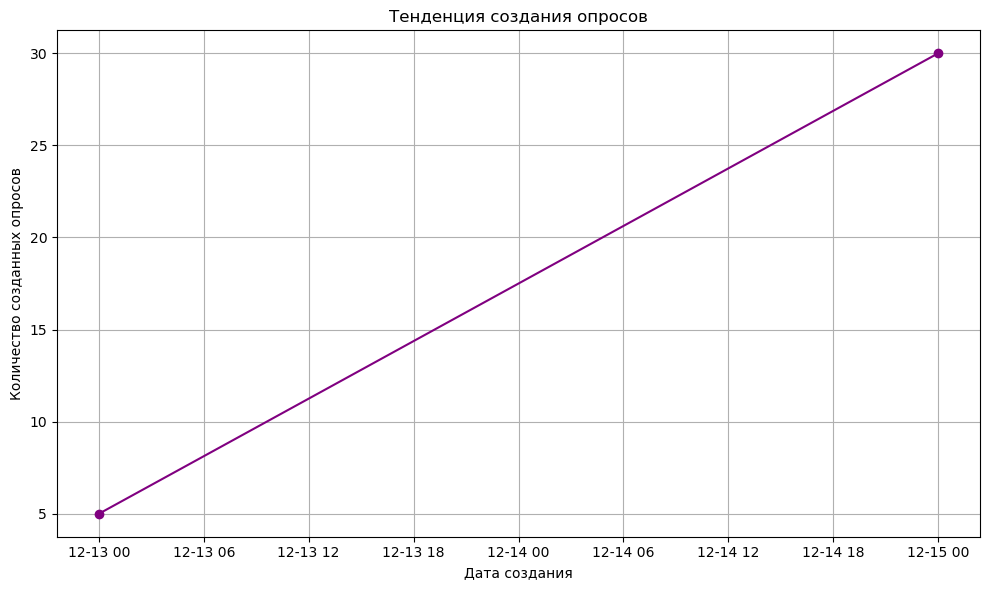

In [12]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Conexión a la base de datos
connection = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="123456",
    database="hello_mysql"
)

# 1. Gráfico de barras: Número de preguntas por encuesta
query1 = """
    SELECT s.title, COUNT(q.id) AS question_count
    FROM Surveys s
    LEFT JOIN Questions q ON s.id = q.survey_id
    GROUP BY s.id;
"""
df1 = pd.read_sql(query1, connection)
plt.figure(figsize=(10, 6))
plt.bar(df1['title'], df1['question_count'], color='skyblue')
plt.title('Количество вопросов в одном опросе')
plt.xlabel('Опросы')
plt.ylabel('Количество вопросов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Histograma: Promedio de respuestas por encuesta
query2 = """
    SELECT s.title, AVG(LENGTH(a.answer_text)) AS avg_response_length
    FROM Surveys s
    LEFT JOIN Questions q ON s.id = q.survey_id
    LEFT JOIN Answers a ON q.id = a.question_id
    GROUP BY s.id;
"""
df2 = pd.read_sql(query2, connection)
plt.figure(figsize=(10, 6))
plt.hist(df2['avg_response_length'], bins=10, color='orange', alpha=0.7)
plt.title('Средняя продолжительность ответов в одном опросе')
plt.xlabel('Средняя продолжительность ответов')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# 3. Diagrama circular: Proporción de estados de encuestas
query3 = """
    SELECT status, COUNT(*) AS count
    FROM Surveys
    GROUP BY status;
"""
df3 = pd.read_sql(query3, connection)
plt.figure(figsize=(8, 8))
plt.pie(df3['count'], labels=df3['status'], autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Доля опрошенных государств')
plt.show()

# 4. Gráfico de líneas: Tendencia de creación de encuestas
query4 = """
    SELECT DATE(created_at) AS creation_date, COUNT(*) AS surveys_created
    FROM Surveys
    GROUP BY DATE(created_at)
    ORDER BY creation_date;
"""
df4 = pd.read_sql(query4, connection)
plt.figure(figsize=(10, 6))
plt.plot(df4['creation_date'], df4['surveys_created'], marker='o', color='purple')
plt.title('Тенденция создания опросов')
plt.xlabel('Дата создания')
plt.ylabel('Количество созданных опросов')
plt.grid()
plt.tight_layout()
plt.show()

# Cerrar la conexión
connection.close()
